In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tushare as ts
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
import os
print("当前工作目录:", os.getcwd())

当前工作目录: c:\Users\52839\OneDrive\桌面\new_career\简历说明项\波动率计算


## 配置Tushare参数

In [2]:
# 从folder中调取Tushare的Token
token = list(pd.read_excel("Tushare/Token.xlsx"))[0]
print(token)

bc4dcde8a6de4a4808cea9c4f06df6efa42cedaeed873f3a72615d10


In [5]:
ts.set_token(token)
pro = ts.pro_api()

## 获取科创50指数日线行情数据

In [24]:
df = pro.index_daily(ts_code='000688.SH')
df

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
0,000688.SH,20260113,1469.5699,1508.1834,1511.6531,1460.4093,1511.8360,-42.2661,-2.7957,15234747.00,1.044491e+08
1,000688.SH,20260112,1511.8360,1490.4986,1515.1073,1478.8467,1475.9676,35.8684,2.4302,15675919.00,1.066402e+08
2,000688.SH,20260109,1475.9676,1442.2237,1477.2394,1437.5770,1455.1729,20.7947,1.4290,13306405.00,9.100617e+07
3,000688.SH,20260108,1455.1729,1441.1859,1483.2305,1441.1859,1443.3880,11.7849,0.8165,13482288.00,9.924798e+07
4,000688.SH,20260107,1443.3880,1442.5066,1452.0445,1427.9802,1429.3023,14.0857,0.9855,12338548.00,8.712778e+07
...,...,...,...,...,...,...,...,...,...,...,...
1458,000688.SH,20200107,1043.0833,1025.6627,1043.0833,1019.8577,1027.2773,15.8060,1.5386,2675921.67,1.195377e+07
1459,000688.SH,20200106,1027.2773,1019.9989,1040.1404,1019.9989,1024.4819,2.7954,0.2729,2663011.81,1.197895e+07
1460,000688.SH,20200103,1024.4819,1021.6693,1029.0713,1018.6813,1019.7234,4.7585,0.4666,2160583.48,9.677367e+06
1461,000688.SH,20200102,1019.7234,1005.6174,1019.9098,1005.6174,1000.0000,19.7234,1.9723,2193852.76,9.315105e+06


In [8]:
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats

In [9]:
print("可用的样式列表:")
print(plt.style.available)

可用的样式列表:
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [51]:
# 设置中文字体和图表样式
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.style.use('classic')


In [25]:
df

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
0,000688.SH,20260113,1469.5699,1508.1834,1511.6531,1460.4093,1511.8360,-42.2661,-2.7957,15234747.00,1.044491e+08
1,000688.SH,20260112,1511.8360,1490.4986,1515.1073,1478.8467,1475.9676,35.8684,2.4302,15675919.00,1.066402e+08
2,000688.SH,20260109,1475.9676,1442.2237,1477.2394,1437.5770,1455.1729,20.7947,1.4290,13306405.00,9.100617e+07
3,000688.SH,20260108,1455.1729,1441.1859,1483.2305,1441.1859,1443.3880,11.7849,0.8165,13482288.00,9.924798e+07
4,000688.SH,20260107,1443.3880,1442.5066,1452.0445,1427.9802,1429.3023,14.0857,0.9855,12338548.00,8.712778e+07
...,...,...,...,...,...,...,...,...,...,...,...
1458,000688.SH,20200107,1043.0833,1025.6627,1043.0833,1019.8577,1027.2773,15.8060,1.5386,2675921.67,1.195377e+07
1459,000688.SH,20200106,1027.2773,1019.9989,1040.1404,1019.9989,1024.4819,2.7954,0.2729,2663011.81,1.197895e+07
1460,000688.SH,20200103,1024.4819,1021.6693,1029.0713,1018.6813,1019.7234,4.7585,0.4666,2160583.48,9.677367e+06
1461,000688.SH,20200102,1019.7234,1005.6174,1019.9098,1005.6174,1000.0000,19.7234,1.9723,2193852.76,9.315105e+06


In [26]:
# 将trade_date转换为datetime格式
df['trade_date'] = pd.to_datetime(df['trade_date'], format='%Y%m%d')

In [27]:
# 计算日收益率（使用pct_chg字段，注意单位转换）
df['daily_return'] = df['pct_chg'] / 100  # 原始数据是百分比，转换为小数

In [31]:
df = df.sort_values('trade_date', ascending=True)
df

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,daily_return,volatility_30d,volatility_60d,volatility_180d
1462,000688.SH,2019-12-31,1000.0000,NaN,NaN,NaN,NaN,NaN,NaN,1516205.33,6.818057e+06,NaN,NaN,NaN,NaN
1461,000688.SH,2020-01-02,1019.7234,1005.6174,1019.9098,1005.6174,1000.0000,19.7234,1.9723,2193852.76,9.315105e+06,0.019723,0.701548,0.631639,0.493272
1460,000688.SH,2020-01-03,1024.4819,1021.6693,1029.0713,1018.6813,1019.7234,4.7585,0.4666,2160583.48,9.677367e+06,0.004666,0.701886,0.631350,0.493428
1459,000688.SH,2020-01-06,1027.2773,1019.9989,1040.1404,1019.9989,1024.4819,2.7954,0.2729,2663011.81,1.197895e+07,0.002729,0.701967,0.633759,0.495265
1458,000688.SH,2020-01-07,1043.0833,1025.6627,1043.0833,1019.8577,1027.2773,15.8060,1.5386,2675921.67,1.195377e+07,0.015386,0.701612,0.634020,0.495751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,000688.SH,2026-01-07,1443.3880,1442.5066,1452.0445,1427.9802,1429.3023,14.0857,0.9855,12338548.00,8.712778e+07,0.009855,NaN,NaN,NaN
3,000688.SH,2026-01-08,1455.1729,1441.1859,1483.2305,1441.1859,1443.3880,11.7849,0.8165,13482288.00,9.924798e+07,0.008165,NaN,NaN,NaN
2,000688.SH,2026-01-09,1475.9676,1442.2237,1477.2394,1437.5770,1455.1729,20.7947,1.4290,13306405.00,9.100617e+07,0.014290,NaN,NaN,NaN
1,000688.SH,2026-01-12,1511.8360,1490.4986,1515.1073,1478.8467,1475.9676,35.8684,2.4302,15675919.00,1.066402e+08,0.024302,NaN,NaN,NaN


In [32]:
# 计算滚动年化波动率
# 年化波动率 = 日收益率标准差 * √252
df['volatility_30d'] = df['daily_return'].rolling(window=30).std() * np.sqrt(252)
df['volatility_60d'] = df['daily_return'].rolling(window=60).std() * np.sqrt(252)
df['volatility_180d'] = df['daily_return'].rolling(window=180).std() * np.sqrt(252)


In [33]:
df

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,daily_return,volatility_30d,volatility_60d,volatility_180d
1462,000688.SH,2019-12-31,1000.0000,NaN,NaN,NaN,NaN,NaN,NaN,1516205.33,6.818057e+06,NaN,NaN,NaN,NaN
1461,000688.SH,2020-01-02,1019.7234,1005.6174,1019.9098,1005.6174,1000.0000,19.7234,1.9723,2193852.76,9.315105e+06,0.019723,NaN,NaN,NaN
1460,000688.SH,2020-01-03,1024.4819,1021.6693,1029.0713,1018.6813,1019.7234,4.7585,0.4666,2160583.48,9.677367e+06,0.004666,NaN,NaN,NaN
1459,000688.SH,2020-01-06,1027.2773,1019.9989,1040.1404,1019.9989,1024.4819,2.7954,0.2729,2663011.81,1.197895e+07,0.002729,NaN,NaN,NaN
1458,000688.SH,2020-01-07,1043.0833,1025.6627,1043.0833,1019.8577,1027.2773,15.8060,1.5386,2675921.67,1.195377e+07,0.015386,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,000688.SH,2026-01-07,1443.3880,1442.5066,1452.0445,1427.9802,1429.3023,14.0857,0.9855,12338548.00,8.712778e+07,0.009855,0.229756,0.281802,0.284246
3,000688.SH,2026-01-08,1455.1729,1441.1859,1483.2305,1441.1859,1443.3880,11.7849,0.8165,13482288.00,9.924798e+07,0.008165,0.230120,0.268050,0.284088
2,000688.SH,2026-01-09,1475.9676,1442.2237,1477.2394,1437.5770,1455.1729,20.7947,1.4290,13306405.00,9.100617e+07,0.014290,0.231480,0.268120,0.284362
1,000688.SH,2026-01-12,1511.8360,1490.4986,1515.1073,1478.8467,1475.9676,35.8684,2.4302,15675919.00,1.066402e+08,0.024302,0.237699,0.271591,0.285558


In [34]:
df.to_excel("df1.xlsx")

In [49]:
import matplotlib
print(matplotlib.__path__)

['f:\\Anaconda\\lib\\site-packages\\matplotlib']


No handles with labels found to put in legend.


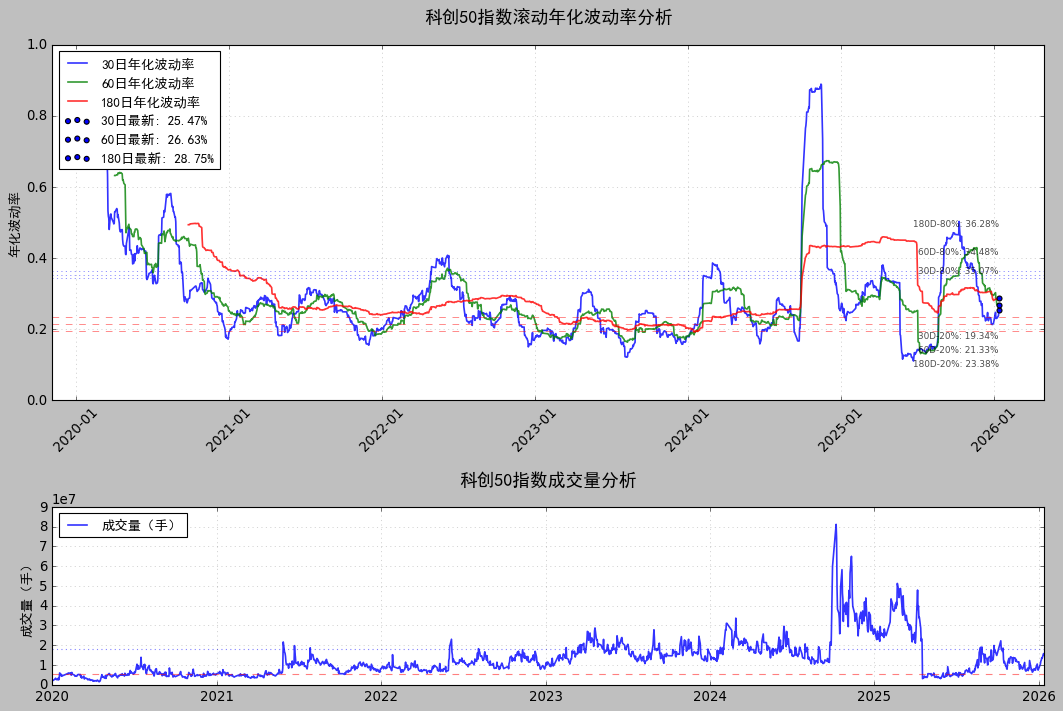

In [70]:
# 创建包含两个子图的图表
fig, axes = plt.subplots(2, 1, figsize=(16, 10), 
                        gridspec_kw={'hspace': 0.4, 'height_ratios': [2, 1]})
font_prop = fm.FontProperties(fname=fm.findfont('SimHei'), size=12)
# 第一个子图：年化波动率
ax1 = axes[0]

# 绘制三条波动率曲线
ax1.legend(prop=font_prop)
ax1.plot(df['trade_date'], df['volatility_30d'], label='30日年化波动率', linewidth=1.5, alpha=0.8)
ax1.plot(df['trade_date'], df['volatility_60d'], label='60日年化波动率', linewidth=1.5, alpha=0.8)
ax1.plot(df['trade_date'], df['volatility_180d'], label='180日年化波动率', linewidth=1.5, alpha=0.8)

# 计算并添加分位数水平线
for i, window in enumerate([30, 60, 180]):
    vol_col = f'volatility_{window}d'
    vol_data = df[vol_col].dropna()
    
    if len(vol_data) > 0:
        # 计算20%、50%、80%分位数
        p20 = np.percentile(vol_data, 20)
        p50 = np.percentile(vol_data, 50)
        p80 = np.percentile(vol_data, 80)
        
        # 添加水平参考线
        ax1.axhline(y=p20, color='red', linestyle='--', alpha=0.5, linewidth=0.8)
        ax1.axhline(y=p80, color='blue', linestyle=':', alpha=0.5, linewidth=0.8)
         # 修改这里：为不同窗口的标签添加垂直偏移
        y_offset_multiplier = i * 0.06  # 每个窗口偏移1.5%       
        # 在图表右侧添加分位数标签
        y_pos = df[vol_col].iloc[-1] if not pd.isna(df[vol_col].iloc[-1]) else vol_data.iloc[-1]
        ax1.text(df['trade_date'].iloc[-1], p20 - y_offset_multiplier, f'{window}D-20%: {p20:.2%}', 
                ha='right', va='top', fontsize=8, alpha=0.7)
        ax1.text(df['trade_date'].iloc[-1], p80 + y_offset_multiplier, f'{window}D-80%: {p80:.2%}', 
                ha='right', va='bottom', fontsize=8, alpha=0.7)

# 添加最新值标记
latest_date = df['trade_date'].iloc[-1]
for window in [30, 60, 180]:
    vol_col = f'volatility_{window}d'
    latest_vol = df[vol_col].iloc[-1]
    if not pd.isna(latest_vol):
        ax1.scatter(latest_date, latest_vol, s=20, zorder=5, 
                   label=f'{window}日最新: {latest_vol:.2%}')

ax1.set_title('科创50指数滚动年化波动率分析',fontproperties=font_prop,  fontsize=16, fontweight='bold', pad=20)
ax1.set_ylabel('年化波动率',fontproperties=font_prop, fontsize=12)
ax1.legend(loc='upper left', prop=font_prop)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(bottom=0)  # 波动率最小为0

# 设置x轴日期格式
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m'))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)


# 第二个子图：成交量
ax2 = axes[1]
ax2.plot(df['trade_date'], df['vol'], label='成交量（手）', linewidth=1.5, alpha=0.8)

vol_data2 = df['vol'].dropna()
p20 = np.percentile(vol_data2, 20)
p80 = np.percentile(vol_data2, 80)
ax2.axhline(y=p20, color='red', linestyle='--', alpha=0.5, linewidth=1.0)
ax2.axhline(y=p80, color='blue', linestyle=':', alpha=0.5, linewidth=1.0)
# 设置第二个子图的标题和标签
ax2.set_title('科创50指数成交量分析', fontproperties=font_prop, fontsize=16, fontweight='bold', pad=20)
ax2.set_ylabel('成交量（手）', fontproperties=font_prop, fontsize=12)
ax2.legend(loc='upper left', prop=font_prop)
ax2.grid(True, alpha=0.3)